## Import Data

In [2]:
import os
import random
import shutil

def split_dir_to_train_test_val(directory="rawdataset/",
                                 train_size=0.7,
                                 test_size=0.2,
                                 val_size=0.1):
    # Set random seed for reproducibility
    rng = random.Random(42)

    # Create output directories
    output_dirs = ["files/train", "files/test", "files/validation"]
    for output_dir in output_dirs:
        os.makedirs(output_dir, exist_ok=True)
        for i in range(10):
            os.makedirs(os.path.join(output_dir, str(i)), exist_ok=True)

    for root, folders, _ in os.walk(directory):
        for folder in folders:
            list_of_files = os.listdir(os.path.join(root, folder))
            rng.shuffle(list_of_files)

            # Split files into training, testing, and validation sets
            total_files = len(list_of_files)
            train_count = int(total_files * train_size)
            test_count = int(total_files * test_size)
            
            train_files = list_of_files[:train_count]
            test_files = list_of_files[train_count:train_count + test_count]
            val_files = list_of_files[train_count + test_count:]

            # Copy files to the respective directories
            for one_file in train_files:
                shutil.copy2(src=os.path.join(root, folder, one_file),
                             dst=os.path.join("files/train", folder, one_file))
            print(f"Folder {folder}. Train data copied: {len(train_files)} files")

            for one_file in test_files:
                shutil.copy2(src=os.path.join(root, folder, one_file),
                             dst=os.path.join("files/test", folder, one_file))
            print(f"Folder {folder}. Test data copied: {len(test_files)} files")

            for one_file in val_files:
                shutil.copy2(src=os.path.join(root, folder, one_file),
                             dst=os.path.join("files/validation", folder, one_file))
            print(f"Folder {folder}. Validation data copied: {len(val_files)} files")

# Call the function to split the images
split_dir_to_train_test_val(directory="rawdataset/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder 9. Train data copied: 70 files
Folder 9. Test data copied: 20 files
Folder 9. Validation data copied: 10 files
Folder 0. Train data copied: 70 files
Folder 0. Test data copied: 20 files
Folder 0. Validation data copied: 10 files
Folder 7. Train data copied: 70 files
Folder 7. Test data copied: 20 files
Folder 7. Validation data copied: 10 files
Folder 6. Train data copied: 70 files
Folder 6. Test data copied: 20 files
Folder 6. Validation data copied: 10 files
Folder 1. Train data copied: 70 files
Folder 1. Test data copied: 20 files
Folder 1. Validation data copied: 10 files
Folder 8. Train data copied: 70 files
Folder 8. Test data copied: 20 files
Folder 8. Validation data copied: 10 files
Folder 4. Train data copied: 70 files
Folder 4. Test data copied: 20 files
Folder 4. Validation data copied: 10 files
Folder 3. Train data copied: 70 files
Folder 3. Test data copied: 20 files
Folder 3. Validation data copied: 10 files
Folder 2. Train data copied: 70 files
Folder 2. Test dat

## Explore and visualize the data

In [3]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['.DS_Store', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='<U9')

In [4]:
len(class_names)

11

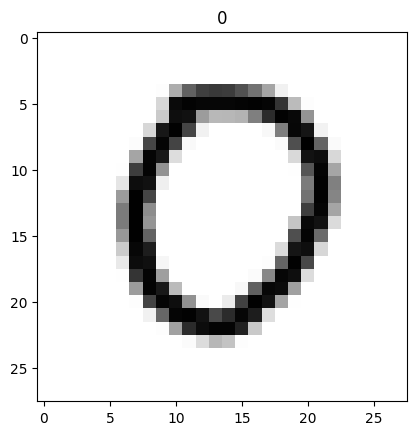

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "0")

## Create datasets from directories

In [7]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators for training, testing, and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    directory="files/train",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Load testing data
test_data = test_datagen.flow_from_directory(
    directory="files/test",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Load validation data
validation_data = val_datagen.flow_from_directory(
    directory="files/validation",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 700 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


## Create and fit the model

Found 700 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.1804 - loss: 3.0576 - val_accuracy: 0.9583 - val_loss: 0.8258
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.8583 - val_accuracy: 0.7500 - val_loss: 1.0821
Epoch 3/3


2025-03-15 00:55:18.967831: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2025-03-15 00:55:18.980178: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9585 - loss: 0.4443 - val_accuracy: 0.9792 - val_loss: 0.0981
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9735 - loss: 0.1155


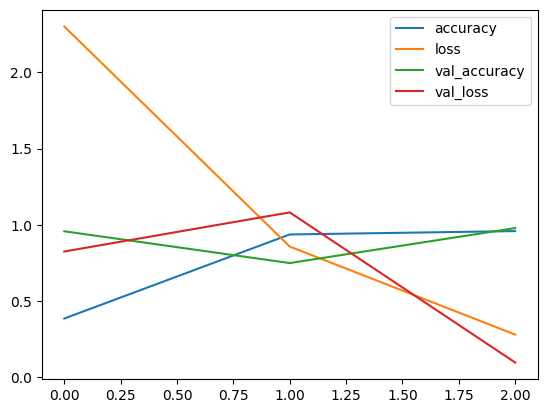

In [8]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators for training, testing, and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    directory="files/train",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Load testing data
test_data = test_datagen.flow_from_directory(
    directory="files/test",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Load validation data
validation_data = val_datagen.flow_from_directory(
    directory="files/validation",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

"""## Create and fit the model"""


# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])




# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])


# Fit the model

batch_sizes = 32
epoch = 3
trainsteps = (train_data.n//batch_sizes)
valsteps = (validation_data.n//batch_sizes)

history = model.fit(train_data,
                    batch_size=batch_sizes,
                    epochs=epoch,
                    steps_per_epoch=trainsteps,
                    validation_data=validation_data,
                    validation_steps=valsteps)




# Evaluate model


model.evaluate(test_data)

import pandas as pd

pd.DataFrame(history.history).plot()

model.save('my_model.keras')

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_model = tf.keras.models.load_model('my_model.keras')

image_path = 'files/test/0/0-094.png'  # Replace with the actual image path
image = load_img(image_path, target_size=(240, 240))
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


# Make predictions using the loaded model
predictions = new_model.predict(image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Print the predicted class index and corresponding class label
print('Predicted Class Index:', predicted_class_index)

# Assuming you have a list of class labels
class_labels = ['0','1','2','3','4','5','6','7','8','9']  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]

print('Predicted Class Label:', predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class Index: 0
Predicted Class Label: 0


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_model = tf.keras.models.load_model('my_model.keras')

image_path = 'files/test/0/0-094.png'  # Replace with the actual image path
image = load_img(image_path, target_size=(240, 240))
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Make predictions using the loaded model
predictions = new_model.predict(image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the confidence for the predicted class
confidence = predictions[0][predicted_class_index] * 100  # Convert to percentage

# Print the predicted class index, corresponding class label, and prediction confidence
print('Predicted Class Index:', predicted_class_index)
class_labels = ['0','1','2','3','4','5','6','7','8','9']  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]
print('Predicted Class Label:', predicted_class_label)
print('Prediction Confidence (%):', confidence)

# Get softmax values for all categories
softmax_output = tf.nn.softmax(predictions)

# Convert softmax output to a numpy array for easier manipulation
softmax_values = softmax_output.numpy()

# Print softmax values for all categories
print(softmax_values)
print(softmax_values[0][predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted Class Index: 0
Predicted Class Label: 0
Prediction Confidence (%): 99.99839067459106
[[0.23196614 0.08533695 0.08533768 0.08533741 0.08533697 0.08533703
  0.08533695 0.08533695 0.08533702 0.08533695]]
0.23196614
